In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
raw_data = pd.read_csv('//home//kpu//Desktop//flights.csv')

/home/kpu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
raw_data

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.20,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.30,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.50,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.60,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,279,152.10,1.1,198.0,22.857437,0.095421,-79.782802,40.459018,271.560190,0.021382,...,0.009449,0.444553,-0.274965,-9.796700,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257892,279,152.20,1.1,196.0,22.847422,0.095421,-79.782802,40.459018,271.571983,0.021383,...,-0.001755,0.451230,-0.240619,-9.793810,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257893,279,152.41,1.2,189.0,22.856186,0.111325,-79.782802,40.459018,271.584533,0.021385,...,0.008545,0.443839,-0.274903,-9.796004,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257894,279,152.60,1.1,187.0,22.854933,0.127228,-79.782802,40.459018,271.588050,0.021393,...,-0.001379,0.443880,-0.248434,-9.794703,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7


In [ ]:
df_test = raw_data.where(raw_data['flight'] > 254).dropna()
df_train = raw_data.where(raw_data['flight'] <= 254).dropna()

In [ ]:
df_train

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1.0,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1.0,0.20,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1.0,0.30,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1.0,0.50,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1.0,0.60,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231213,254.0,164.80,0.2,272.0,24.426258,-0.071566,-79.782786,40.459086,272.719980,-0.011178,...,-0.001535,-0.041591,0.181471,-9.804514,10.0,500.0,50,2019-08-05,18:16,R1
231214,254.0,164.99,0.2,272.0,24.435022,-0.079518,-79.782786,40.459086,272.740023,-0.011190,...,0.004797,-0.037800,0.178051,-9.803998,10.0,500.0,50,2019-08-05,18:16,R1
231215,254.0,165.10,0.1,274.0,24.423754,-0.071566,-79.782786,40.459086,272.760173,-0.011171,...,0.002507,-0.040792,0.183647,-9.804060,10.0,500.0,50,2019-08-05,18:16,R1
231216,254.0,165.31,0.1,276.0,24.438778,-0.063614,-79.782786,40.459086,272.760661,-0.011166,...,0.003003,-0.037292,0.176174,-9.804671,10.0,500.0,50,2019-08-05,18:16,R1


In [ ]:
df_train_1 = df_train.where(df_train["flight"]==1).dropna()
df_train_1 

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1.0,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1.0,0.20,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1.0,0.30,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1.0,0.50,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1.0,0.60,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1.0,200.12,0.5,106.0,23.061522,0.135180,-79.782348,40.458035,268.296291,-0.000503,...,-0.001796,0.232549,0.733589,-9.772775,4.0,0.0,25,2019-04-07,10:13,R5
1335,1.0,200.30,0.5,104.0,23.070286,0.135180,-79.782348,40.458034,268.307138,-0.000486,...,-0.004984,0.230562,0.743619,-9.772132,4.0,0.0,25,2019-04-07,10:13,R5
1336,1.0,200.40,0.5,99.0,23.067781,0.143132,-79.782348,40.458034,268.310919,-0.000496,...,-0.005924,0.234810,0.736684,-9.774733,4.0,0.0,25,2019-04-07,10:13,R5
1337,1.0,200.60,0.5,103.0,23.059017,0.119277,-79.782348,40.458034,268.324848,-0.000478,...,0.000394,0.232103,0.732756,-9.772891,4.0,0.0,25,2019-04-07,10:13,R5


In [ ]:
values = df_train_1['linear_acceleration_x'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)



In [ ]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

937 402


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [ ]:


look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


936
401


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam",metrics="mape")
history = model.fit(trainX, trainY, epochs=100, 
                    batch_size=50, 
                    validation_data=(testX, testY), shuffle=False)

Epoch 1/100
19/19 [==============================] - 2s 25ms/step - loss: 0.1228 - mape: 89.0256 - val_loss: 0.0738 - val_mape: 329827.8125
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0651 - mape: 65.2467 - val_loss: 0.0353 - val_mape: 608418.2500
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0289 - mape: 42.2780 - val_loss: 0.0157 - val_mape: 863850.4375
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0111 - mape: 27.0408 - val_loss: 0.0093 - val_mape: 1037132.5000
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0051 - mape: 19.5360 - val_loss: 0.0080 - val_mape: 1106960.6250
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0037 - mape: 16.9053 - val_loss: 0.0078 - val_mape: 1115379.2500
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0036 - mape: 16.4763 - val_loss: 0.0078 - val_mape: 1109928.1250
Epoch 8/100
19/19 [===

Epoch 59/100
19/19 [==============================] - 0s 6ms/step - loss: 7.9535e-04 - mape: 6.4975 - val_loss: 0.0041 - val_mape: 1276368.0000
Epoch 60/100
19/19 [==============================] - 0s 6ms/step - loss: 7.9236e-04 - mape: 6.4640 - val_loss: 0.0041 - val_mape: 1277260.1250
Epoch 61/100
19/19 [==============================] - 0s 6ms/step - loss: 7.8988e-04 - mape: 6.4355 - val_loss: 0.0041 - val_mape: 1278036.3750
Epoch 62/100
19/19 [==============================] - 0s 6ms/step - loss: 7.8783e-04 - mape: 6.4109 - val_loss: 0.0041 - val_mape: 1278708.3750
Epoch 63/100
19/19 [==============================] - 0s 6ms/step - loss: 7.8614e-04 - mape: 6.3900 - val_loss: 0.0041 - val_mape: 1279286.5000
Epoch 64/100
19/19 [==============================] - 0s 6ms/step - loss: 7.8475e-04 - mape: 6.3723 - val_loss: 0.0041 - val_mape: 1279780.6250
Epoch 65/100
19/19 [==============================] - 0s 6ms/step - loss: 7.8363e-04 - mape: 6.3575 - val_loss: 0.0041 - val_mape: 12802

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)


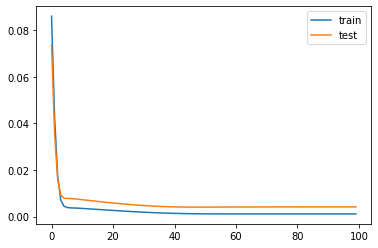

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

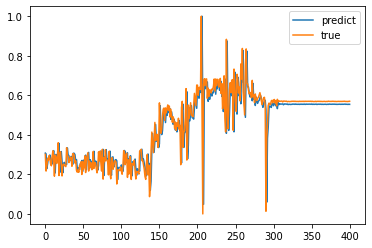

In [ ]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [ ]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.288


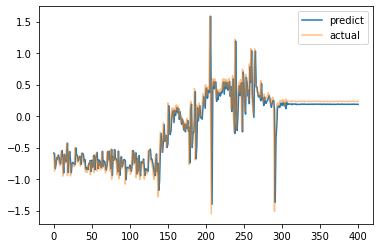

In [ ]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

In [ ]:
predictDates = df_train_1.tail(len(testX)).index
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict')
py.iplot([predict_chart, actual_chart])



<AxesSubplot:>

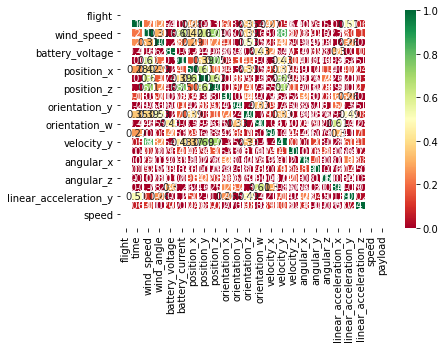

In [ ]:
sns.heatmap(df_train_1.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [ ]:
check = df_test.where(df_test["flight"]==260).dropna()
check

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
236333,260.0,0.00,0.1,220.0,25.530565,-0.103373,-79.782745,40.459057,271.286757,-0.006771,...,0.008870,-0.239602,0.002475,-9.806328,4.0,0.0,75,2019-08-05,18:55,R1
236334,260.0,0.10,0.1,231.0,25.534323,-0.087470,-79.782745,40.459057,271.303465,-0.006739,...,-0.005847,-0.247144,0.017469,-9.803864,4.0,0.0,75,2019-08-05,18:55,R1
236335,260.0,0.30,0.1,239.0,25.535574,-0.047711,-79.782745,40.459057,271.305013,-0.006732,...,0.007743,-0.240546,0.001900,-9.807447,4.0,0.0,75,2019-08-05,18:55,R1
236336,260.0,0.40,0.1,251.0,25.536827,-0.087470,-79.782745,40.459057,271.325351,-0.006676,...,-0.000235,-0.237057,0.021632,-9.801843,4.0,0.0,75,2019-08-05,18:55,R1
236337,260.0,0.60,0.1,258.0,25.531818,-0.087470,-79.782745,40.459057,271.326813,-0.006660,...,0.008366,-0.240315,-0.000571,-9.800798,4.0,0.0,75,2019-08-05,18:55,R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237960,260.0,244.10,0.3,202.0,24.049391,-0.055662,-79.782782,40.459063,268.373645,-0.002441,...,0.003270,0.022382,-0.073670,-9.804321,4.0,0.0,75,2019-08-05,18:55,R1
237961,260.0,244.30,0.3,200.0,24.051893,-0.039759,-79.782782,40.459063,268.375682,-0.002445,...,-0.010163,0.018148,-0.049313,-9.804411,4.0,0.0,75,2019-08-05,18:55,R1
237962,260.0,244.40,0.3,198.0,24.048138,-0.055662,-79.782782,40.459063,268.390835,-0.002445,...,0.003655,0.020340,-0.073352,-9.804966,4.0,0.0,75,2019-08-05,18:55,R1
237963,260.0,244.61,0.3,196.0,24.053146,-0.047711,-79.782782,40.459063,268.392531,-0.002463,...,-0.010726,0.017523,-0.049257,-9.805325,4.0,0.0,75,2019-08-05,18:55,R1


In [ ]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [ ]:
check

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
236333,260.0,0.00,0.1,220.0,25.530565,-0.103373,-79.782745,40.459057,271.286757,-0.006771,...,0.008870,-0.239602,0.002475,-9.806328,4.0,0.0,75,2019-08-05,18:55,R1
236334,260.0,0.10,0.1,231.0,25.534323,-0.087470,-79.782745,40.459057,271.303465,-0.006739,...,-0.005847,-0.247144,0.017469,-9.803864,4.0,0.0,75,2019-08-05,18:55,R1
236335,260.0,0.30,0.1,239.0,25.535574,-0.047711,-79.782745,40.459057,271.305013,-0.006732,...,0.007743,-0.240546,0.001900,-9.807447,4.0,0.0,75,2019-08-05,18:55,R1
236336,260.0,0.40,0.1,251.0,25.536827,-0.087470,-79.782745,40.459057,271.325351,-0.006676,...,-0.000235,-0.237057,0.021632,-9.801843,4.0,0.0,75,2019-08-05,18:55,R1
236337,260.0,0.60,0.1,258.0,25.531818,-0.087470,-79.782745,40.459057,271.326813,-0.006660,...,0.008366,-0.240315,-0.000571,-9.800798,4.0,0.0,75,2019-08-05,18:55,R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237960,260.0,244.10,0.3,202.0,24.049391,-0.055662,-79.782782,40.459063,268.373645,-0.002441,...,0.003270,0.022382,-0.073670,-9.804321,4.0,0.0,75,2019-08-05,18:55,R1
237961,260.0,244.30,0.3,200.0,24.051893,-0.039759,-79.782782,40.459063,268.375682,-0.002445,...,-0.010163,0.018148,-0.049313,-9.804411,4.0,0.0,75,2019-08-05,18:55,R1
237962,260.0,244.40,0.3,198.0,24.048138,-0.055662,-79.782782,40.459063,268.390835,-0.002445,...,0.003655,0.020340,-0.073352,-9.804966,4.0,0.0,75,2019-08-05,18:55,R1
237963,260.0,244.61,0.3,196.0,24.053146,-0.047711,-79.782782,40.459063,268.392531,-0.002463,...,-0.010726,0.017523,-0.049257,-9.805325,4.0,0.0,75,2019-08-05,18:55,R1


In [ ]:
values = check['linear_acceleration_x'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
look_back = 1
checkX, checkY = create_dataset(train, look_back)
checkX = np.reshape(checkX, (checkX.shape[0], 1, checkX.shape[1]))


1142 490
1141


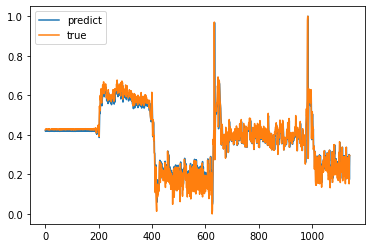

In [ ]:
yhat = model.predict(checkX)
pyplot.plot(yhat, label='predict')
pyplot.plot(checkY, label='true')
pyplot.legend()
pyplot.show()